# The Movies Dataset

<div align="left">
<a href="https://github.com/madewithml/incubator/blob/master/datasets/movies/data.ipynb" role="button"><img class="notebook-badge-image" src="https://img.shields.io/static/v1?label=&amp;message=View%20On%20GitHub&amp;color=586069&amp;logo=github&amp;labelColor=2f363d"></a>&nbsp;
<a href="https://colab.research.google.com/github/madewithml/incubator/blob/master/movies/data.ipynb"><img class="notebook-badge-image" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
</div>

## Download

Download the data from the source to your file system so you can start exploring it. The official dataset is located [here](https://www.kaggle.com/rounakbanik/the-movies-dataset/data) but we **highly** recommend using our slightly cleaned version [here](https://drive.google.com/drive/folders/1ZGp7ORu9nA6l3PyNK_H0MGTXNl4sNMsA?usp=sharing) (where we combined movies, keywords and credits into one DataFrame).

We didn't do much preprocessing (because we want you to learn how to do that) but we did make sure the data formats are easier to handle etc. as the original dataset is a bit unconventionally stored (ex. they had a string of lists of dicts as values in a Pandas Dataframe which is hopefully something you never see in the real world).

## Features

Some light feature exploration on the different data CSVs.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams

### Movies

Rich metadata about each movie including it's title, description, genres, etc.

In [2]:
# Load movies
movies = pd.read_csv("../data/drive/movies.csv", header=0)
movies = movies.replace({np.nan: None}) # replace NaN with None
movies.head()

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,...,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,862,Toy Story,None,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family","jealousy, toy, boy, friendship, friends, rival...",1995-10-30,Toy Story Collection,81,3.73554e+08,...,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.9469,7.7,5415,en,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family","board game, disappearance, based on children's...",1995-12-15,None,104,2.62797e+08,...,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.0155,6.9,2413,en,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"romance, comedy","fishing, best friend, duringcreditsstinger, ol...",1995-12-22,Grumpy Old Men Collection,101,0,...,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.7129,6.5,92,en,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","comedy, drama, romance","based on novel, interracial relationship, sing...",1995-12-22,None,127,8.14522e+07,...,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",Twentieth Century Fox Film Corporation,United States of America,3.85949,6.1,34,en,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,comedy,"baby, midlife crisis, confidence, aging, daugh...",1995-02-10,Father of the Bride Collection,106,7.65789e+07,...,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Sandollar Productions, Touchstone Pictures",United States of America,8.38752,5.7,173,en,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [3]:
movies.shape

(46628, 21)

In [4]:
movies.isnull().sum()

id                          0
title                       4
tagline                 25845
description               995
genres                   2524
keywords                14889
date                       88
collection              42054
runtime                   268
revenue                     4
budget                      0
director                  917
cast                     2491
production_companies    12282
production_countries     6496
popularity                  4
average_vote                4
num_votes                   4
language                   11
imdb_id                    17
poster_url                399
dtype: int64

In [5]:
movies[movies['revenue']==0]

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,...,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"romance, comedy","fishing, best friend, duringcreditsstinger, ol...",1995-12-22,Grumpy Old Men Collection,101,0,...,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.7129,6.5,92,en,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
6,11860,Sabrina,You are cordially invited to the most surprisi...,An ugly duckling having undergone a remarkable...,"comedy, romance","paris, brother brother relationship, chauffeur...",1995-12-15,None,127,0,...,Sydney Pollack,"Harrison Ford, Julia Ormond, Greg Kinnear, Ang...","Paramount Pictures, Scott Rudin Productions, M...","Germany, United States of America",6.67728,6.2,141,en,tt0114319,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg
7,45325,Tom and Huck,The Original Bad Boys.,"A mischievous young boy, Tom Sawyer, witnesses...","action, adventure, drama, family",None,1995-12-22,None,97,0,...,Peter Hewitt,"Jonathan Taylor Thomas, Brad Renfro, Rachael L...",Walt Disney Pictures,United States of America,2.56116,5.4,45,en,tt0112302,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg
11,12110,Dracula: Dead and Loving It,None,When a lawyer shows up at the vampire's doorst...,"comedy, horror","dracula, spoof",1995-12-22,None,88,0,...,Mel Brooks,"Leslie Nielsen, Mel Brooks, Amy Yasbeck, Peter...","Columbia Pictures, Castle Rock Entertainment, ...","France, United States of America",5.43033,5.7,210,en,tt0112896,/xve4cgfYItnOhtzLYoTwTVy5FGr.jpg
21,1710,Copycat,One man is copying the most notorious killers ...,An agoraphobic psychologist and a female detec...,"drama, thriller","police brutality, psychology, police operation...",1995-10-27,None,124,0,...,Jon Amiel,"Sigourney Weaver, Holly Hunter, Will Patton, W...","Regency Enterprises, New Regency Pictures",United States of America,10.7018,6.5,199,en,tt0112722,/80czeJGSoik22fhtUM9WzyjUU4r.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46623,439050,Subdue,Rising and falling between a man and woman,Rising and falling between a man and woman.,"drama, family",tragic love,None,None,90,0,...,Hamid Nematollah,"Leila Hatami, Kourosh Tahami, Elham Korda",None,Iran,0.072051,4,1,fa,tt6209470,/jldsYflnId4tTWPx8es3uzsB1I8.jpg
46624,111109,Century of Birthing,None,An artist struggles to finish his work while a...,drama,"artist, play, pinoy",2011-11-17,None,360,0,...,Lav Diaz,"Angel Aquino, Perry Dizon, Hazel Orencio, Joel...",Sine Olivia,Philippines,0.178241,9,3,tl,tt2028550,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg
46625,67758,Betrayal,A deadly game of wits.,"When one of her hits goes wrong, a professiona...","action, drama, thriller",None,2003-08-01,None,90,0,...,Mark L. Lester,"Erika Eleniak, Adam Baldwin, Julie du Page, Ja...",American World Pictures,United States of America,0.903007,3.8,6,en,tt0303758,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg
46626,227506,Satan Triumphant,None,"In a small town live two brothers, one a minis...",None,None,1917-10-21,None,87,0,...,Yakov Protazanov,"Iwan Mosschuchin, Nathalie Lissenko, Pavel Pav...",Yermoliev,Russia,0.003503,0,0,en,tt0008536,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg


In [6]:
movies.shape

(46628, 21)

In [7]:
46628-39087

7541

In [3]:
movies.columns

Index(['id', 'title', 'tagline', 'description', 'genres', 'keywords', 'date',
       'collection', 'runtime', 'revenue', 'budget', 'director', 'cast',
       'production_companies', 'production_countries', 'popularity',
       'average_vote', 'num_votes', 'language', 'imdb_id', 'poster_url'],
      dtype='object')

In [4]:
movies[["title","tagline","description","keywords","genres"]]

,title,tagline,description,keywords,genres
0,Toy Story,None,"Led by Woody, Andy's toys live happily in his ...","jealousy, toy, boy, friendship, friends, rival...","animation, comedy, family"
1,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"board game, disappearance, based on children's...","adventure, fantasy, family"
2,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"fishing, best friend, duringcreditsstinger, ol...","romance, comedy"
3,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","based on novel, interracial relationship, sing...","comedy, drama, romance"
4,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,"baby, midlife crisis, confidence, aging, daugh...",comedy
...,...,...,...,...,...
46623,Subdue,Rising and falling between a man and woman,Rising and falling between a man and woman.,tragic love,"drama, family"
46624,Century of Birthing,None,An artist struggles to finish his work while a...,"artist, play, pinoy",drama
46625,Betrayal,A deadly game of wits.,"When one of her hits goes wrong, a professiona...",None,"action, drama, thriller"
46626,Satan Triumphant,None,"In a small town live two brothers, one a minis...",None,None


In [5]:
movies["text_data"] = movies["title"] + " " + movies["tagline"] + " " + movies["description"] +  " " \
                    + movies["keywords"] +  " " + movies["genres"]

In [6]:
movies[["text_data"]]

,text_data
0,NaN
1,Jumanji Roll the dice and unleash the exciteme...
2,Grumpier Old Men Still Yelling. Still Fighting...
3,Waiting to Exhale Friends are the people who l...
4,Father of the Bride Part II Just When His Worl...
...,...
46623,Subdue Rising and falling between a man and wo...
46624,NaN
46625,NaN
46626,NaN


In [7]:
# Total
print (f"{len(movies)} movies in total.")

46628 movies in total.


total of 20 unique genres from 93342 occurances.


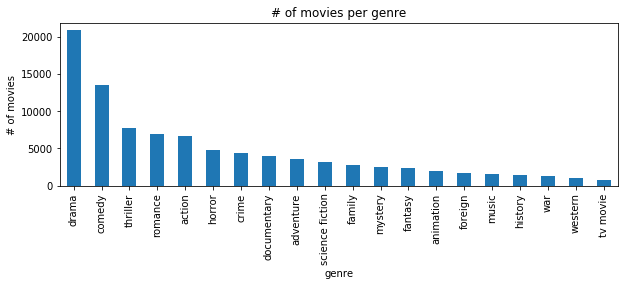

In [8]:
# Genres
all_genres = [s.split(", ") for s in movies[movies.genres.notnull()].genres]
genres = [item for l in all_genres for item in l ]
unique_genres = set(genres)
print (f"total of {len(unique_genres)} unique genres from {len(genres)} occurances.")
pd.Series(genres).value_counts().plot(kind='bar', figsize=(10, 3))
plt.title("# of movies per genre")
plt.ylabel("# of movies")
plt.xlabel("genre")
plt.show()

In [9]:
def get_year(date):
    year = None
    if date:
        year = date[:4]
    return year

In [10]:
# Year (example of basic feature engineering)
movies['year'] = movies.date.apply(get_year) # same as movies.date.apply(lambda date: get_year(date))

Total of 135 uinque years from 1874 to 2020


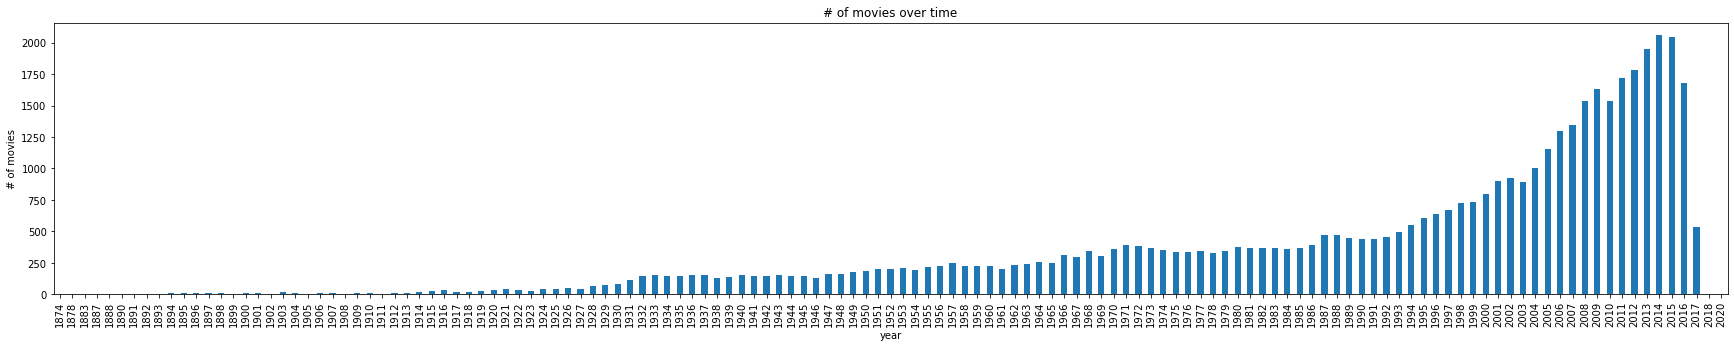

In [11]:
# Years
years = movies[movies.year.notnull()].year # get rows where year is not None
print (f"Total of {len(set(years))} uinque years from {min(years)} to {max(years)}")
pd.Series(years).value_counts().sort_index().plot(kind='bar', figsize=(30, 5))
plt.title("# of movies over time")
plt.ylabel("# of movies")
plt.xlabel("year")
plt.show()

In [12]:
# Sort by popularity
sorted_by_popularity = movies.sort_values(by='popularity', ascending=False)
print ("Most popular movies:\n", sorted_by_popularity['title'].values[:10])

Most popular movies:
 ['Minions' 'Wonder Woman' 'Beauty and the Beast' 'Baby Driver'
 'Big Hero 6' 'Deadpool' 'Guardians of the Galaxy Vol. 2' 'Avatar'
 'John Wick' 'Gone Girl']


In [13]:
# Get poster image
from IPython.core.display import display, HTML
prefix_url = 'http://image.tmdb.org/t/p/'
poster_sizes = ["w92", "w154", "w185", "w342", "w500", "w780", "original"]
full_url = prefix_url + poster_sizes[2] + movies.poster_url[0]
display(HTML(f'<img src="{full_url}">'))

### Ratings

User ratings for each movie. We are using the smaller set of ratings (subset of 100,000 ratings from 700 users on 9,000 movies.) but you can download the full version (26 million ratings from 270,000 users for all 45,000 movies) from the [source](https://www.kaggle.com/rounakbanik/the-movies-dataset/data). 

In [14]:
# Load ratings
ratings = pd.read_csv("../data/drive/ratings_small.csv", header=0)
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


The first row in the dataframe above can be read as the following: userId `1` voted `2.5` on movieId `31` at timestamp `1260759144`.

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


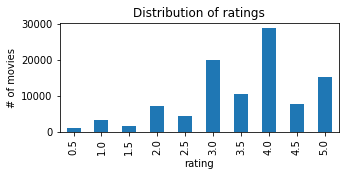

In [15]:
# Distribution of ratings
print (ratings['rating'].describe())
pd.Series(ratings['rating']).value_counts().sort_index().plot(kind='bar', figsize=(5, 2))
plt.title("Distribution of ratings")
plt.ylabel("# of movies")
plt.xlabel("rating")
plt.show()

## Project ideas

Details and resources for different project directions using this dataset. When you're developing your models, start with simple approaches first and then slowly add complexity. You should clearly document (README, articles and [Weights and Biases reports](https://www.youtube.com/watch?v=o2dOSIDDr1w)) and save your progression from simple to more complex models so your audience can see the improvements. The ability to write well and document your thinking process is a core skill to have in research and industry.

- **Moderate Projects** 

    - **[Exploratory analysis](https://madewithml.com/projects/160/programming-probabilistically/)**: relationships between staff/revenue, popularity/genre, etc. These could be simple statistical tests to validate some hypothesis (ex. action movies get better ratings than horror movies). This project can also involve a lot of exploratory analysis. 
        - People should not dismiss this project because this kind of statistical analysis is **very prevalent** in the industry. Not everything is about using deep learning to predict classes and it's kind of analysis that many marketing, advertising, science, etc. industries utilize every day to make their decisions.

    - **[Text classification](https://madewithml.com/topics/text-classification/)**: multi-class classification of movie genres using title, ratings, etc. You can also be very creative here and try to get more metadata like movie descriptions from online using the ids provided in the dataset.
        - When you're developing your models, start with simple approaches first and then slowly add complexity. For example, start with analyzing the text as tokens and using [logistic regression](https://madewithml.com/topics/logistic-regression/). Then explore [embeddings](https://madewithml.com/topics/embeddings/) with [CNNs](https://madewithml.com/topics/convolutional-neural-networks/) and [RNNs](https://madewithml.com/topics/recurrent-neural-networks/) and eventually attempt to use contextualized embeddings, pretrained [Transformers](https://madewithml.com/topics/transformers/) from [HuggingFace](https://madewithml.com/search-results/?tags=huggingface), etc.

    - **Miscellaneous**: predict numerical statistics like revenue, popularity, etc. given title, genre, production companies, etc. Here you can start with simple models like [linear regression]() and then try out ensemble methods like [random forests]() and evetually use neural networks. If you have time, you can even explore more recent methods that offer the performance of large networks with the interpretability of simples models - for example: [TabNet](https://madewithml.com/projects/1001/tabnet-attentive-interpretable-tabular-learning/) or [Neural Backed Decision Trees](https://madewithml.com/projects/659/neural-backed-decision-trees/).

- **Challenging projects**
    - [**Recommendation systems**](https://madewithml.com/topics/recommendation-systems/): recommend a movie based on liked movies. There are a lot of different approaches here but the most common technique will be content based. Ask the user to select movies that they like (from the dataset) and then recommend similar movies (based on genres, ratings, cast, crew, etc.) that they'd enjoy. 

    - [**Text generation**](https://madewithml.com/topics/text-generation/): generate the `tagline` or `overview` from movie title, genre, poster image, etc. or vice versa. You should definitely leverage pretrained language models here and then you can fine-tune using text from this dataset. 

    - [**Named entity recognition**](https://madewithml.com/topics/named-entity-recognition/): identify entities in movie titles and descriptions. This dataset doesn't come with any labeled entities however you can use a trained NER model to extract relevant entites that model can handle. This isn't much of an application so if you do choose this project, we suggest extending this to things like few-shot NER using embeddings, etc.

    - [**Few-shot learning**](https://madewithml.com/topics/few-shot-learning/): identify genres using one or just a few samples, also check out [self-supervision](https://madewithml.com/search-results/?tags=self-supervised-learning&tags=natural-language-processing) techniques in NLP where you can create meaningful tasks with the data that extract relevant signal from the latent space which can then be used for classification with very few samples. 

---
Learn, explore and build at <a href="https://madewithml.com/">Made With ML</a>.

<div align="left">
<a class="ai-header-badge" target="_blank" href="https://github.com/madewithml/basics"><img src="https://img.shields.io/github/stars/madewithml/basics.svg?style=social&label=Star"></a>&nbsp;
<a class="ai-header-badge" target="_blank" href="https://www.linkedin.com/company/madewithml"><img src="https://img.shields.io/badge/style--5eba00.svg?label=LinkedIn&logo=linkedin&style=social"></a>&nbsp;
<a class="ai-header-badge" target="_blank" href="https://www.youtube.com/channel/UCaVCnFQXS7PYMoYZu3KdC0Q?sub_confirmation=1"><img src="https://img.shields.io/badge/style--5eba00.svg?label=YouTube&logo=youtube&style=social"></a>&nbsp;<a class="ai-header-badge" target="_blank" href="https://twitter.com/madewithml"><img src="https://img.shields.io/twitter/follow/madewithml.svg?label=Follow&style=social"></a>
</div>
             